Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 01: Basic Operations - Convolution

## Introduction

The homework sheets will usually be available on Monday and are supposed to be solved in groups of three. They have to be handed in before Monday morning of the following week. The exercises are then presented to your tutor in a small feedback session. To acquire the admission for the final exam, you will have to pass $N-2$ of the weekly provided exercise sheets.

Sign up for a group on Stud.IP (See `Participants` -> `Functions/Groups`). The times mentioned there are the times for the feedback session of your group. If none of them fits, send any of the tutors an e-mail so we can try to arrange something. 

Your group will have a group folder in Stud.IP under `Documents`. Upload your solutions there to hand them in.

All exercise sheets will use [Jupyter Notebooks](http://jupyter-notebook.readthedocs.org/en/latest/notebook.html). To be able to run these on your system, you will need to install Python and a few packages. We suggest you to use the latest version of Python 3. In case you are not familiar with it, follow the directives below ([Assignment 0](#install-conda)) to get it up and running. [Assignment 0b](#run-jupyter) on this sheet will provide details on how to run the notebooks with Jupyter.

This week's sheet should be solved and handed in before the end of **Sunday, November 11, 2018**. 
Please upload your results to your group's Stud.IP folder. In case you cannot do this first sheet (due to technical or organizational problems) please upload a description of your problem instead. Your tutor will help you to solve the problems in the first feedback session and you may hand in this sheet together with the second sheet one week later.

<a name="install-conda"></a>
## Assignment 0: Setup your homework environment [0 Points]

This exercise gives you no points, but it is required to do the other exercises. If you have problems, do not hesitate to contact us.

### a) Install Conda

To be able to run Jupyter Notebooks you will need Python. Follow this exercise to get everything up and running.

We recommend to use Anaconda:
* Download and install Anaconda from https://www.anaconda.com/ that contains all important Python packages.
* If you have limited diskspace install Miniconda https://conda.io/miniconda.html instead, which contains only conda and Python.

Follow the installation instructions on the web site.

### b) Setup the `cv` environment

Download `cv.yml` from Stud.IP. Then in a terminal navigate to the directory where you saved `cv.yml` and run

```sh
conda env create -f cv.yml 
```

### c) Activate the environment 

Always activate the enviornment when you work on the homework. 

Linux/Mac OS:

```sh
source activate cv
```
    
For Windows:
```sh
activate cv
```

<a name="run-jupyter"></a>
### b) Run Jupyter Notebooks

After you installed Python and Jupyter verify you are able to run the notebook server by opening your command line, navigate to the directory where you downloaded the `sheet01.ipynb` to, e.g. `~/university/CV2018-19` or `C:\Users\Documents\University\CV2018-19` and run jupyter in that directory.

```sh
cd ~/university/CV2018-19
jupyter notebook
```

Usually a browser window should open up. If not, open your favorite webbrowser and navigate to [localhost:8888/tree](localhost:8888/tree).

You will be presented with a list of files, choose `sheet01.ipynb`: You are good to go now and can start working on your homework right away!

### c) Check your installation
Check that your installation succeeded and all required packages are available by executing the following cell (type <kbd>Ctrl</kbd>+<kbd>&#x23ce;</kbd>, on German keyboards <kbd>Strg</kbd>+<kbd>&#x23ce;</kbd>, or press the "run cell"-button at the toolbar above):

In [13]:
import importlib
assert importlib.util.find_spec('numpy') is not None , 'numpy not found'
assert importlib.util.find_spec('matplotlib') is not None, 'matplotlib not found'
assert importlib.util.find_spec('scipy') is not None , 'scipy not found'

### Remarks:

* If you experience any troubles, ask your fellow students or send us an e-mail - we are always happy to help.
* If you do not want to use Python to do the exercises, but prefer another programming language, you may ask the tutors if they are willing to support it. However, the practice sessions will focus on Python and will probably not cover other languages.

## Assignment 1: Twodimensional Convolution [8 Points]

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works.

A convolution is a mapping for a pixel that includes that pixel's neighboorhood. It is the sum of the component-wise multiplication:

$$g^\prime(x,y) = \sum_{i\in [-m,m]}\sum_{j\in [-n,n]} g(x+i,y+j)\, k(i+m,j+n)$$

### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Proof your answers.

A convolution is linear and homogenous. Given images $g_1,g_2$ of size $M\times N$and kernel $k$ of size $(2m+1)\times (2n+1)$:

#### Linear

1. $f(g_1) + f(g_2) = f(g_1+g_2)$
2. $\alpha f(g_1) = f(\alpha\,g_1)$

#### Homogenous

3. $f(g_1(x_1,y_1),x_1,y_1) = f(g_1(x_2,y_2),x_2,y_2)$ with $g(x_i,y_i) = g(x_j,y_j)\,\forall\,i,j\in M\times N$ and $x_1\neq x_2, y_1\neq y_2$

$$\begin{align*}
\textbf{Regarding 1:}\qquad&\\[3mm]
f(g_1) + f(g_2) &= \sum_{i\in[-m,m]}\sum_{j\in[-n,n]} g(x_1+i,y_1+j)\, k(i+m,j+n) + \sum_{i\in[-m,m]}\sum_{j\in[-n,n]} g(x_2+i,y_2+j)\, k(i+m,j+n)\\
&= \sum_{i\in[-m,m]}\sum_{j\in[-n,n]} g(x_1+i,y_1+j)\, k(i+m,j+n) + g(x_2+i,y_2+j)\, k(i+m,j+n)\\
&= \sum_{i\in[-m,m]}\sum_{j\in[-n,n]} (g(x_1+i,y_1+j) + g(x_2+i,y_2+j))\, k(i+m,j+n)\\
&= f(g_1+g_2)\\[3mm]
\textbf{Regarding 2:}\qquad&\\[3mm]
\alpha f(g_1) &= \alpha \sum_{i\in[-m,m]}\sum_{j\in[-n,n]} g(x_1+i,y_1+j)\, k(i+m,j+n)\\
&= \sum_{i\in[-m,m]}\sum_{j\in[-n,n]} \alpha\,g(x_1+i,y_1+j)\, k(i+m,j+n)\\
&= f(\alpha\,g_1)\\[3mm]
\textbf{Regarding 3:}\qquad&\\[3mm]
f(g_1(x_1,y_1),x_1,y_1) &= \sum_{i\in[-m,m]}\sum_{j\in[-n,n]} g(x_1+i,y_1+j)\, k(i+m,j+n)\\
&= \sum_{i\in[-m,m]}\sum_{j\in[-n,n]} g(x_2+i,y_2+j)\, k(i+m,j+n)\\
&= f(g_1(x_2,y_2),x_2,y_2)
\end{align*}$$

### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

$$\begin{align*}
g * k &= MN\sum_{i\in[-m,m]}\sum_{j\in[-n,n]} g(x_1+i,y_1+j)\, k(i+m,j+n)\\
&= MN(2m+1)(2n+1)
\end{align*}$$

For an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$ the complexity of applying the kernel to a pixel lies in $\mathcal{O}(mn)$. Applying the kernel to the complete image therefore results in $\mathcal{O}(MNmn)$

### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c), but with a separable kernel $k$) and compare the results.

A seperable kernel can be described as a product of two (or more) simple (usually 1D) kernels. This way the computational cost can bre reduced from $\mathcal{O}(mn)$ to $\mathcal{O}(m+n)$ (so from polynomial to linear).

$$\begin{align*}
g * k &= MN\sum_{i\in[-m,m]}k^C(i+m)\left(\sum_{j\in[-n,n]} g(x_1+i,y_1+j)\, k^R(j+n)\right)\\
&= MN((2m+1)+(2n+1))
\end{align*}$$

## Assignment 2: Applying Convolution [4 Points]

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.filters.convolve` to solve this task. Check the documentation to learn how to use this function. 
Then realize the following filters, describe their effect and possible applications.

### a) Box filter

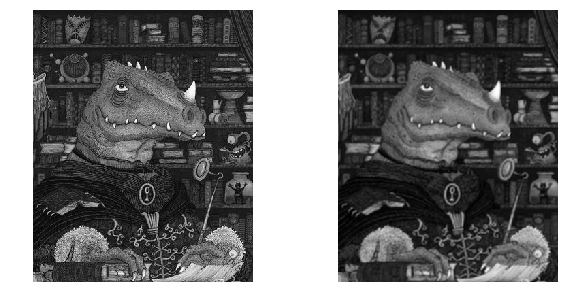

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data
from scipy import ndimage as ndi

#image = data.coins().astype(np.float32)

# Load an image
image = imread('wm.jpg', pilmode = 'F')

# Use box filter
box_filter = np.ones((3,3)) / 9
filtered_image = ndi.convolve(image, box_filter)

fig = plt.figure(figsize=(10,5))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### b) Gaussian filter

You may try different filter sizes.

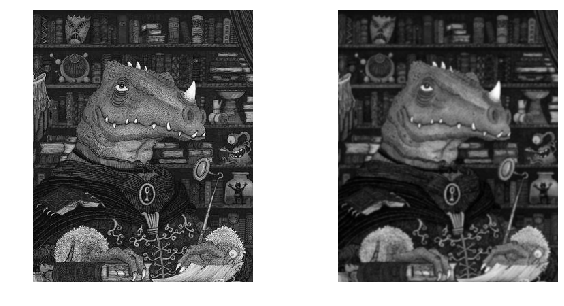

In [15]:
##### import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
image = imread('wm.jpg', pilmode = 'F')

# Use gaussian filter
gauss_3 = np.array([[1,2,1],[2,4,2],[1,2,1]]) / 16
gauss_5 = np.array([[1,4,7,4,1],[4,16,24,16,4],[7,26,41,26,7],[4,16,24,16,4],[1,4,7,4,1]]) / 273
filtered_image = ndi.convolve(image, gauss_5)

fig = plt.figure(figsize=(10,5))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

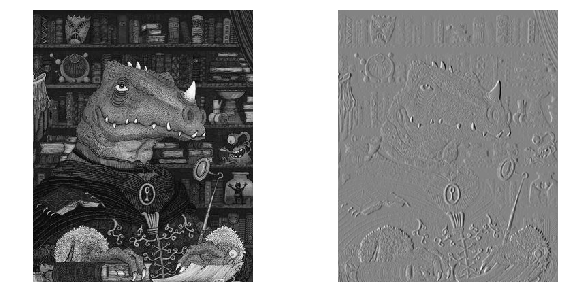

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
image = imread('wm.jpg', pilmode = 'F')

# Use sobel filter
sobely_filter = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobelx_filter = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sobeld1_filter = np.array([[0,1,2],[-1,0,1],[-2,-1,0]])
sobeld2_filter = np.array([[-2,-1,0],[-1,0,1],[0,1,2]])
filtered_image = ndi.convolve(image, sobelx_filter)

fig = plt.figure(figsize=(10,5))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### d) Unsharp Mask

One method to sharpen images is Unsharp Mask in which a negative unsharp mask is added to the original image as follows:

$$\text{Sharpened Image} = \text{Original Image} + (\text{Original Image} - \text{Unsharp Image}) * \text{Amount}$$

The unsharp image can be computed by convolution with a Gaussian Kernel. Implement unsharp masking with a $5\times5$ Gaussian Kernel and a sharpening amount of $1.5$.

Hint: To get good results the final images needs to be clipped to values between $0$ and $255$, i.e. all negative values are set to zero and all values bigger than $255$ are set to $255$.

You may experiment with large or negative sharpening amounts.



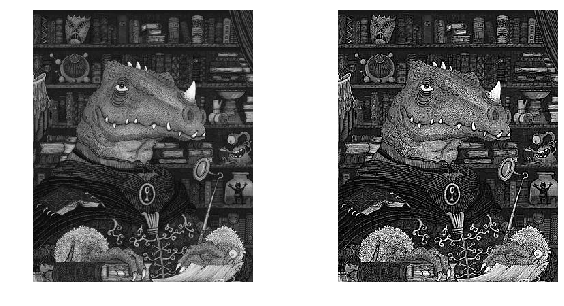

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
image = imread('wm.jpg', pilmode = 'F')

# Define sharpening amount
amount = 1.5

# Define the filters:
gauss_5 = 1/256 * np.asarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

# YOUR CODE HERE
unsharped_image = ndi.convolve(image, gauss_5)
unsharped_mask_image = np.clip(image + (image - unsharped_image) * amount, 0, 255)

fig = plt.figure(figsize=(10,5))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(unsharped_mask_image, cmap = 'gray')
plt.axis('off')
plt.show()

## Assignment 3: Implementing Convolution [8 Points]

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel a argument and return an image of the same size, containing the result of convolving the image with the kernel.

You may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them.

Then apply your function with different kernels. Compare the results with [Assignment 2](#Assignment-2:-Applying-Convolution-[4-Points]).

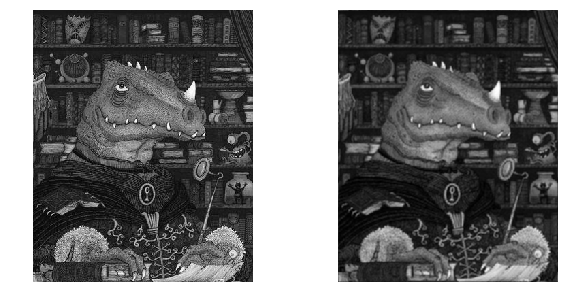

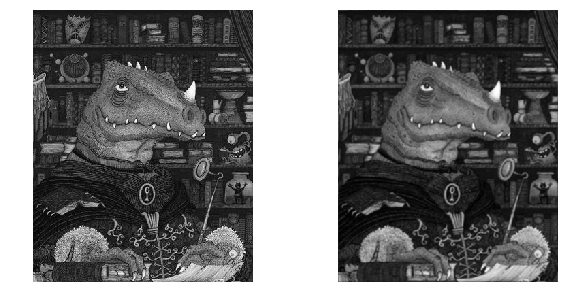

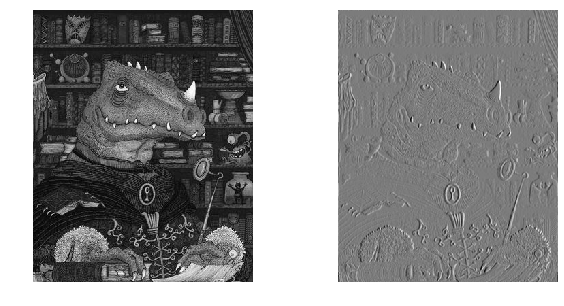

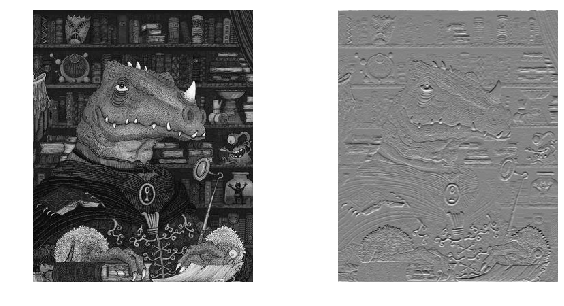

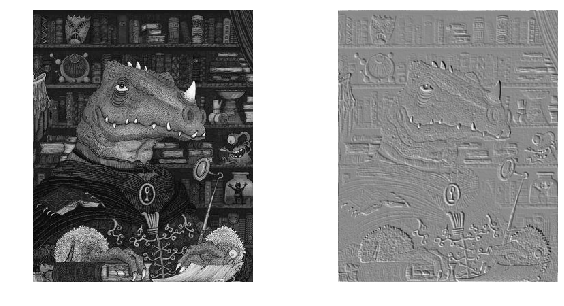

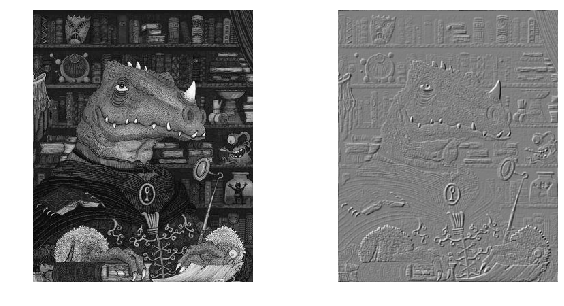

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

def my_convolve2d(img, kern):
    """Convolve an image with a kernel.

    img -- the image, provided as a two-dimensional array
    kern -- the kernel, also a two-dimensional array
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kern.shape
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    # Initialize the result matrix
    result = np.zeros((M,N))
        
    # Compute the convolution
    for i in range(M):
        for j in range(N):
            acc = 0
            for k in range(-mh,mh+1):
                # Compute x index
                x = i+k
                if x < 0:
                    x = x + M
                elif x >= M:
                    x = x % M
                for l  in range(-nh,nh+1):
                    # Compute y index
                    y = j+l
                    if y < 0:
                        y = y + N
                    elif y >= N:
                        y = y % N
                    # Compute new pixel value
                    acc += img[x,y] * kern[k+mh,l+nh]
            result[i,j] = acc
            # result[i,j] = 255 - acc
    return result

#Apply your function to an image:
# Try different filters, compare the results with Assignment 2

# Load the image
image = imread('wm.jpg', pilmode = 'F')

# Box filter
fig1 = plt.figure(figsize=(10,5))
filtered_image = my_convolve2d(image, box_filter)
a=fig1.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig1.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()
# Gaussian filter
fig2 = plt.figure(figsize=(10,5))
filtered_image = my_convolve2d(image, gauss_3)
b=fig2.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
b=fig2.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()
# Sobel x filter
fig4 = plt.figure(figsize=(10,5))
filtered_image = my_convolve2d(image, sobelx_filter)
c=fig4.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
c=fig4.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()
# Sobel y filter
fig5 = plt.figure(figsize=(10,5))
filtered_image = my_convolve2d(image, sobely_filter)
c=fig5.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
c=fig5.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()
# Sobel diagonal 1 filter
fig6 = plt.figure(figsize=(10,5))
filtered_image = my_convolve2d(image, sobeld1_filter)
c=fig6.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
c=fig6.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()
# Sobel diagonal 2 filter
fig7 = plt.figure(figsize=(10,5))
filtered_image = my_convolve2d(image, sobeld2_filter)
c=fig7.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
c=fig7.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()